In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration for better plotting ---
# Make plots larger and more readable
plt.rcParams['figure.figsize'] = (15, 7)
# Use a clean seaborn style
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

# --- Load the Data ---
df = pd.read_csv('../data/processed/bitcoin_sentiment.csv', parse_dates=['date'], index_col='date')
btc_price = pd.read_csv('../data/final/final_dataset.csv', parse_dates=['date'], index_col='date')

# Merge on the index
df = df.merge(btc_price[['btc_price']], left_index=True, right_index=True, how='right')

print("Successfully loaded the dataset and merged with BTC price data.")


Successfully loaded the dataset and merged with BTC price data.


### Find missing Date

In [4]:
# return min and max dates
print("\nDate Range:")
print(f"From {df['date'].min()} to {df['date'].max()}")

# Get all dates in the range
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')

# Find missing dates
missing_dates = set(date_range) - set(df['date'])

if len(missing_dates) > 0:
    print("\nMissing Dates:")
    for date in sorted(missing_dates):
        print(date.strftime('%Y-%m-%d'))
    print(f"\nTotal missing dates: {len(missing_dates)}")
else:
    print("\nNo missing dates in the dataset")


Date Range:
From 2016-11-01 00:00:00 to 2025-01-13 00:00:00

No missing dates in the dataset


1. General Sentiment
   - volume: intensity of discussion about trading volume
   - price: intensity of discussion about price whether up or down
   - marketcap: price*n_coins=overall size & popularity in market
2. Expression
   - bullish: price will rise 1
   - bearish: price will fall
   - positive: positive language 1
   - negative: negative language
   - sad: sad level
   - happy: happy level 1
   - fearful_concerned: fear, worry, concern
   - mistrusful: distrust or skepticism (doubtfulness)
   - optimistic: bullish longer believes 1
   - pessimistic_doubtful: doubtful or pessimism
   - angry: angry level
   - annoyed_frustrated: annoyance or frustration
   - hopeful
   - euphoric_excited: high excitement
3. Risk, Uncertainty & Negative Theme
   - risk
   - uncertain
   - warning
   - market_manipulation: market controls (e.g., Trump control the market)
   - fud_theme: group of Fear, Uncertainty, and Doubt
   - ban: potential or actual government bans on the currency
   - correction: market correction, a temporary decline after rapid growth period
   - bubble: price considered inflated against hypothetical value, rise uncontrol, which result in FOMO in investors
   - bad_news: event
   - hacks: hack or security breaches in wallet, exchange
   - problems_and_issues: general problems
   - scam_fraud: scam & fraud in transaction, losing the coin address
   - pump_and_dump: a form of market manipulation through misleading or exagerated claims, where value of token artifically inflated (pump) to attract investors, then sold off, causing price to crash (dump)
4. Market Actions, Trading & Investing
   - buying
   - selling
   - short_term_trading
   - long_term_investing
   - hodling: intensity of HODLing (holding long-term)
   - porfolio: manage crypto porfolio
   - eft: Bitcoin Exchange-Traded Funds
   - prediction: price prediction
   - bottom: lowest point of prevailing downtrends in a cycle
   - fomo: fear of missing out, when fear of overlook in chance
   - whales: individuals holding large amount of coins, enough to influence whole market
   - ico: initial coin offering, company sell their one token for fundraising
   - fees: bitcoin transaction fees
   - cheap: assume price as cheap or undervalued
   - flippening: hypothetical moment when other cryptocurrency surpass bitcoin's market capitalization
   - going_short: borrow and sell, hoping to buy at lower price to repay loan and profit
   - leverage: using borrowed funds to control larger position than own capital, amplifying profit and losses
   - dip: buying at dip and hoping price will rebound
   - investing_trading: invest (long hold) / trade (short trade)
5. Technology, Development & Ecosystem
   - governance: mechanism by which decision made regarding its future development by whole community and developer
   - stablecoin: stable version of bitcoin
   - scaling: blockchain ability in handle n_transaction and user w/o compromising security or performance
   - recovery: price/technical recovery
   - learning: learning about btc, blockchain technology, or trading
   - technology: underlying blockchain technology
   - whitepaper: original thesis paper that declare the coin
   - bug: in software
   - fork: change in protocol that not universally accepted by all splits
   - mining: process in create new coins and verify new transaction
   - wallet: physical medium/online service storing public/private transaction key
   - open_source: in source code, fostering trust, encourage participation
   - security:
   - de_centralisation: control and decision made by distributed network, ensure censorship and manipulation by no single party, achieved by blockchain
   - token_ecomonics: economic model governing creation, distribution, and manage of token in ecosystem
   - progress: in development or adoption(accepted as widely use currency)
6. News, Event, Community Discussion
   - launch: publish new cryptocurrency
   - annoucements
   - good_news
   - partnerships
   - listing: allow token tradable on exchange platform
   - airdrop: promotion strategy in freely distributed token to wallet address
   - rumor:
   - team: about coin development team
   - marketing
   - shilling: agressively promoting for personal gain, encouraging other to invest in
   - bots: trading/social media bot
   - waiting: of an event
   - community
   - advice_support
   - rebranding: change coin identity, name, logo, or overall image
   - roadmap: project roadmap
   - institutional_money: hedge/pension funds, or corporation investment
   - regulation_politics
   - tax
   - banks
7. Other Concept Discussion
  - adoption: make it recognizable
  - strategy: maybe in buying
  - use_case_applications: coin's use cases
  - competition: bitcoin with other coin
  - due_diligence: conduct thorough due diligence and make inform decision before investing
  - fomo_theme
  - technical_analysis: analyze price chart & pattern in future movements

In [17]:
target_variable = 'btc_price'
features = [col for col in df.columns if col != target_variable]


correlations_with_target = df[features + [target_variable]].corr()[target_variable].sort_values(ascending=False)
print("--- Top 15 features correlated with BTC Price ---")
print(correlations_with_target.head(15))
print("\n--- Bottom 15 features correlated with BTC Price (most negative or least correlated) ---")
print(correlations_with_target.tail(15)[::-1])
# plt.figure(figsize=(10, 12)) # Adjust size based on number of features
# sns.barplot(x=correlations_with_target.drop(target_variable).values, y=correlations_with_target.drop(target_variable).index)
# plt.title('Feature Correlation with BTC Price')
# plt.xlabel('Correlation Coefficient')
# plt.show()

--- Top 15 features correlated with BTC Price ---
btc_price              1.000000
bots                   0.627519
leverage               0.378989
etf                    0.225908
institutional_money    0.206780
portfolio              0.142792
strategy               0.131176
dip                    0.114537
stablecoin             0.111167
euphoric_excited       0.097248
whales                 0.096125
learning               0.090775
volume                 0.083989
going_short            0.059034
warning                0.042929
Name: btc_price, dtype: float64

--- Bottom 15 features correlated with BTC Price (most negative or least correlated) ---
ico                     -0.419578
technology              -0.414748
team                    -0.410475
roadmap                 -0.406920
community               -0.397642
mining                  -0.369250
marketing               -0.355420
ban                     -0.343453
scam_fraud              -0.337486
use_case_applications   -0.335091
token_ec

In [18]:
import matplotlib.dates as mdates

def plot_feature_vs_target(df, feature_name, target_name='btc_price'):
    """Plots a feature and the target on dual axes or normalized with year-only x-axis formatting."""
    if feature_name not in df.columns or target_name not in df.columns:
        print(f"Warning: {feature_name} or {target_name} not in DataFrame columns.")
        return
    
    # 🔒 Ensure index is datetime
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df = df.copy()
        df.index = pd.to_datetime(df.index)

    fig, ax1 = plt.subplots(figsize=(14, 7))
    
    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel(target_name, color=color)
    ax1.plot(df.index, df[target_name], color=color, label=target_name)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel(feature_name, color=color)
    ax2.plot(df.index, df[feature_name], color=color, label=feature_name, alpha=0.7)
    ax2.tick_params(axis='y', labelcolor=color)

    # Format x-axis ticks to show only the year
    ax1.xaxis.set_major_locator(mdates.YearLocator())  # set major ticks every year
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # format ticks to show only the year

    plt.xticks(rotation=45)
    plt.title(f'{target_name} vs. {feature_name}')
    fig.tight_layout()  # adjust layout to prevent clipping
    plt.show()

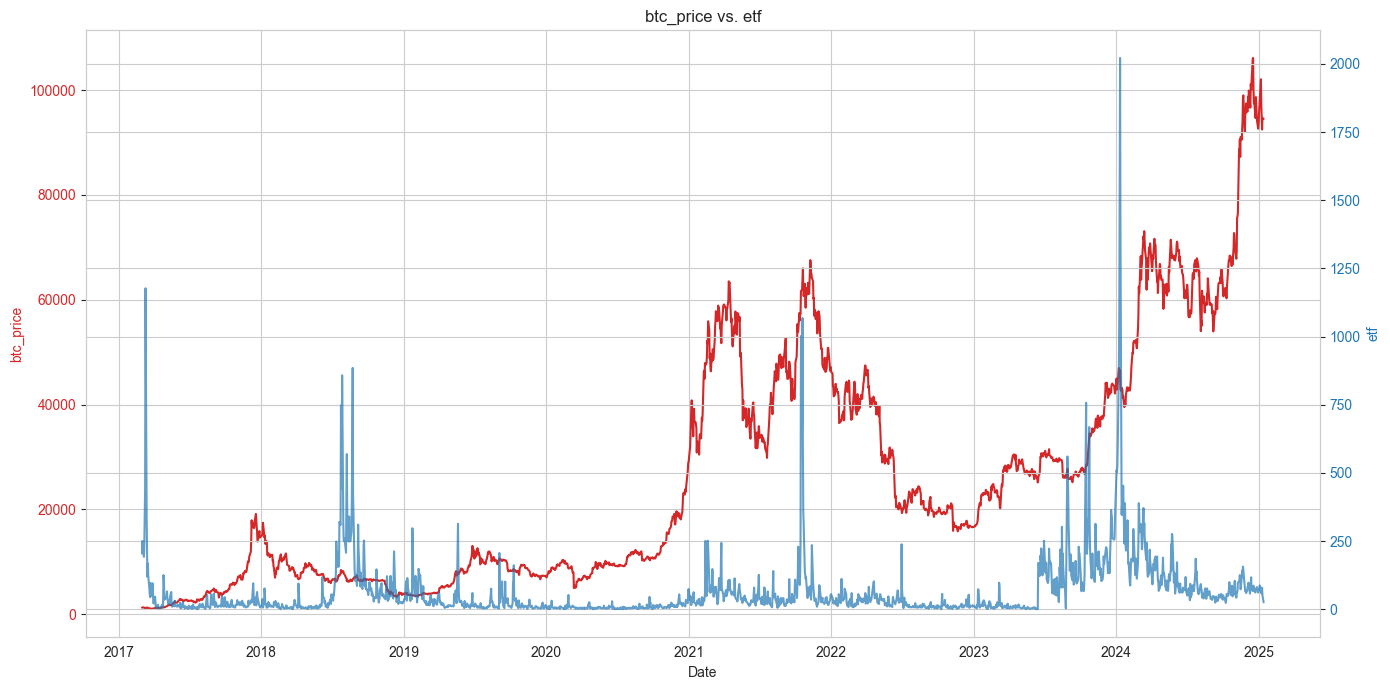

In [24]:
plot_feature_vs_target(df, 'etf')

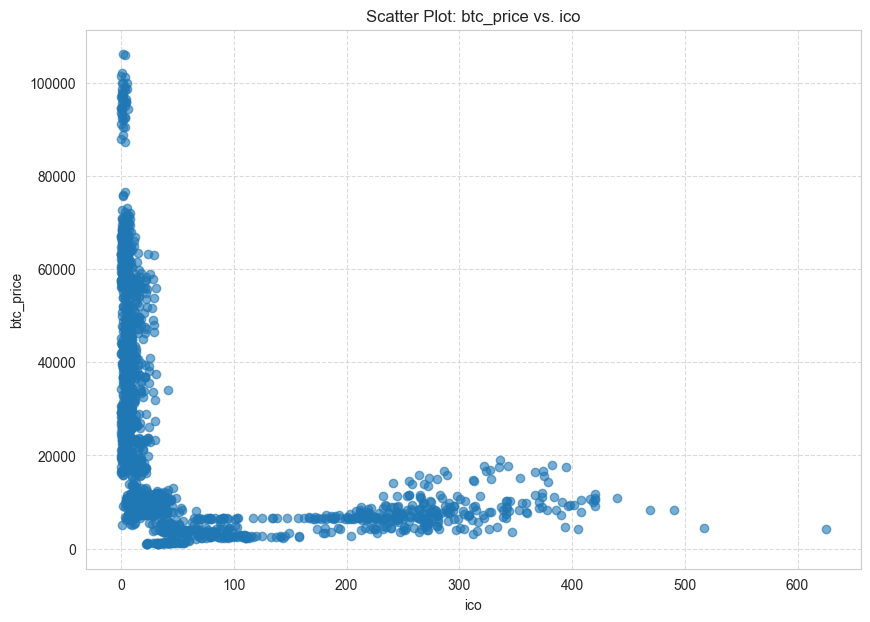

In [29]:
feature = 'ico'

def plot_scatter_correlation(df, feature_name, target_name='btc_price'):
    """Plots a scatter plot to visualize the correlation between a feature and the target."""
    if feature_name not in df.columns or target_name not in df.columns:
        print(f"Warning: {feature_name} or {target_name} not in DataFrame columns.")
        return

    plt.figure(figsize=(10, 7))
    plt.scatter(df[feature_name], df[target_name], alpha=0.6)
    plt.xlabel(feature_name)
    plt.ylabel(target_name)
    plt.title(f'Scatter Plot: {target_name} vs. {feature_name}')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

plot_scatter_correlation(df, feature)

# Sentiment Data Visualizations
This section provides a comprehensive set of visualizations for sentiment/theme analysis, including distribution plots, time series, correlation heatmaps, co-occurrence matrices, and word clouds.

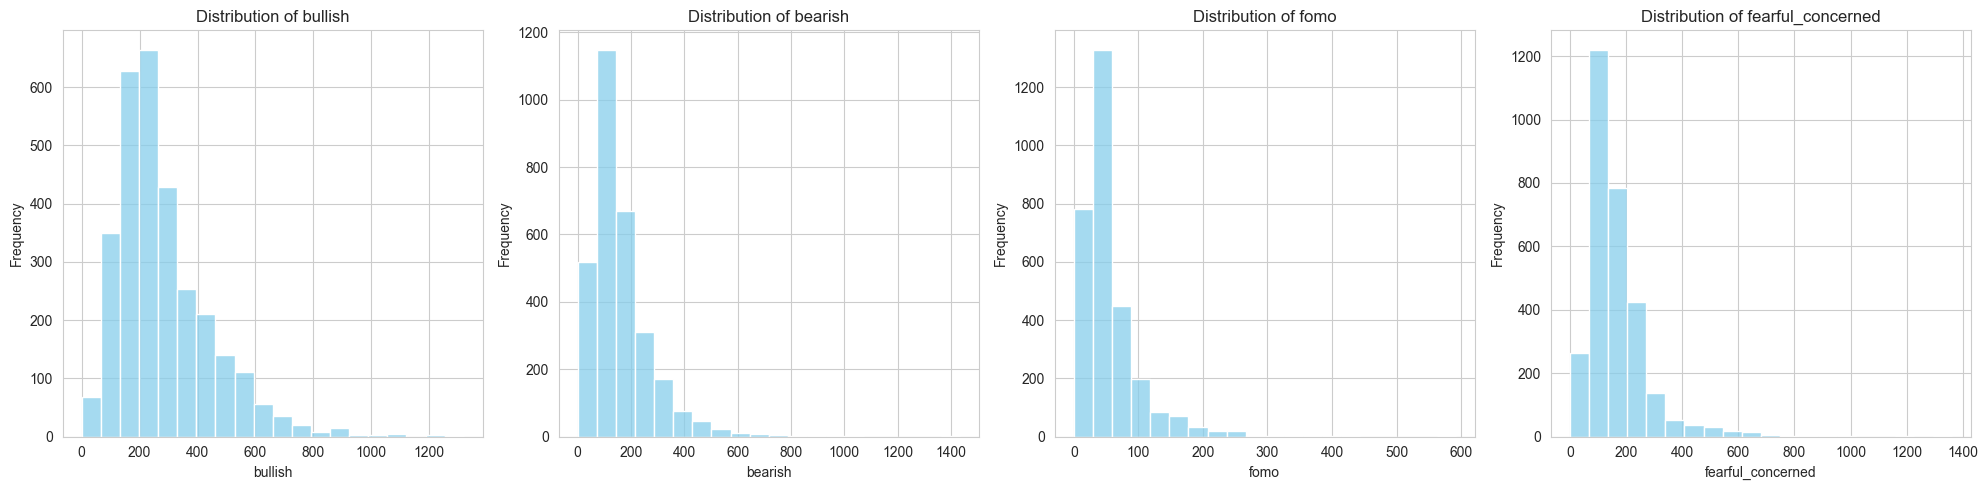

In [ ]:
def plot_sentiment_distributions(df, columns):
    """Plot histograms for each sentiment/theme column in the dataset.

    Args:
        df (pd.DataFrame): The dataframe containing sentiment data.
        columns (list): List of sentiment/theme column names to plot.
    """
    n = len(columns)
    plt.figure(figsize=(5 * n, 5))
    for i, col in enumerate(columns):
        if col in df.columns:
            plt.subplot(1, n, i + 1)
            sns.histplot(df[col].dropna(), kde=False, bins=20, color='skyblue')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
        else:
            print(f"Column '{col}' not found in DataFrame.")
    plt.tight_layout()
    plt.show()

# Example usage:
sentiment_cols = ['bullish', 'bearish', 'fomo', 'fearful_concerned']
plot_sentiment_distributions(df, sentiment_cols)

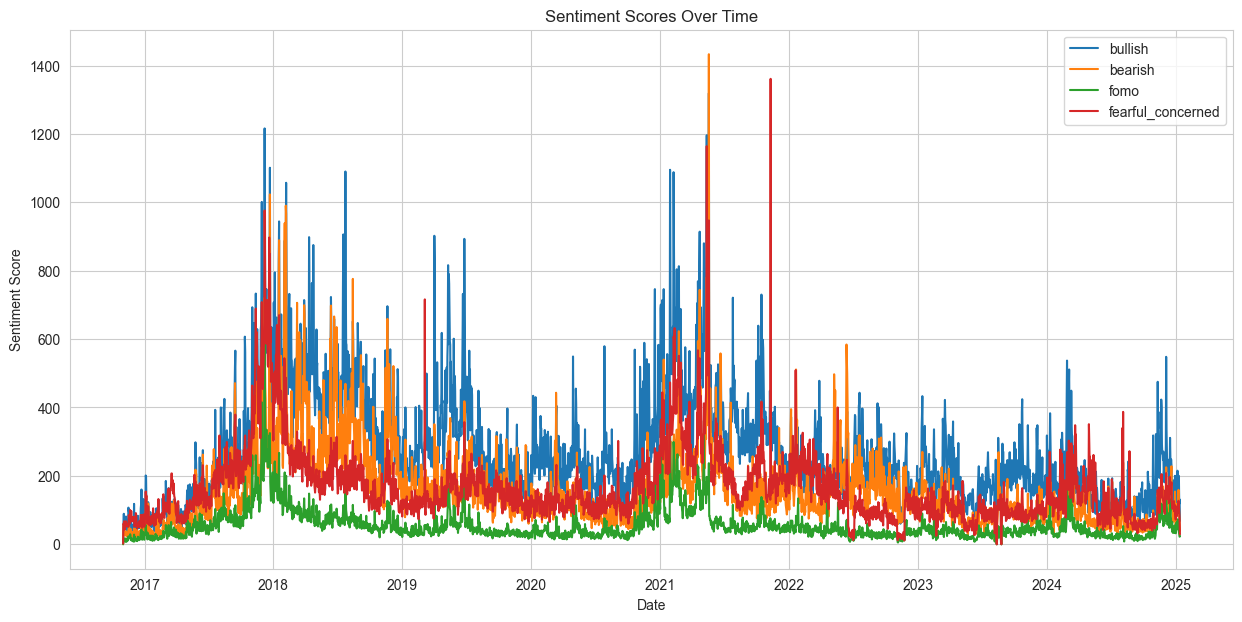

In [ ]:
def plot_sentiment_time_series(df, columns, date_col='date'):
    """Plot time series of sentiment scores for key themes.

    Args:
        df (pd.DataFrame): The dataframe containing sentiment data.
        columns (list): List of sentiment/theme column names to plot.
        date_col (str): Name of the date column.
    """
    import matplotlib.pyplot as plt
    if date_col not in df.columns:
        print(f"Date column '{date_col}' not found.")
        return
    plt.figure(figsize=(15, 7))
    for col in columns:
        if col in df.columns:
            plt.plot(df[date_col], df[col], label=col)
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.title('Sentiment Scores Over Time')
    plt.legend()
    plt.show()

# Example usage:
plot_sentiment_time_series(df, sentiment_cols)

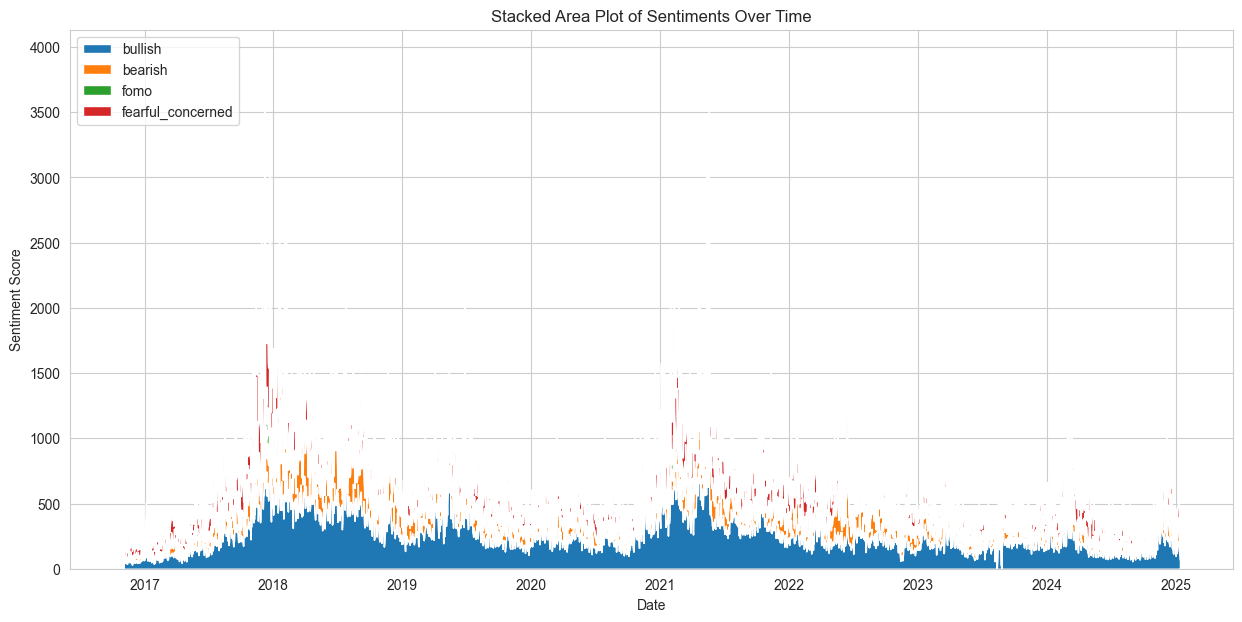

In [ ]:
def plot_stacked_area_sentiments(df, columns, date_col='date'):
    """Plot a stacked area chart for multiple sentiment categories over time.

    Args:
        df (pd.DataFrame): The dataframe containing sentiment data.
        columns (list): List of sentiment/theme column names to plot.
        date_col (str): Name of the date column.
    """
    import matplotlib.pyplot as plt
    if date_col not in df.columns:
        print(f"Date column '{date_col}' not found.")
        return
    available_cols = [col for col in columns if col in df.columns]
    if not available_cols:
        print("No valid sentiment columns found.")
        return
    plt.figure(figsize=(15, 7))
    plt.stackplot(df[date_col], *(df[col] for col in available_cols), labels=available_cols)
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.title('Stacked Area Plot of Sentiments Over Time')
    plt.legend(loc='upper left')
    plt.show()

# Example usage:
plot_stacked_area_sentiments(df, sentiment_cols)

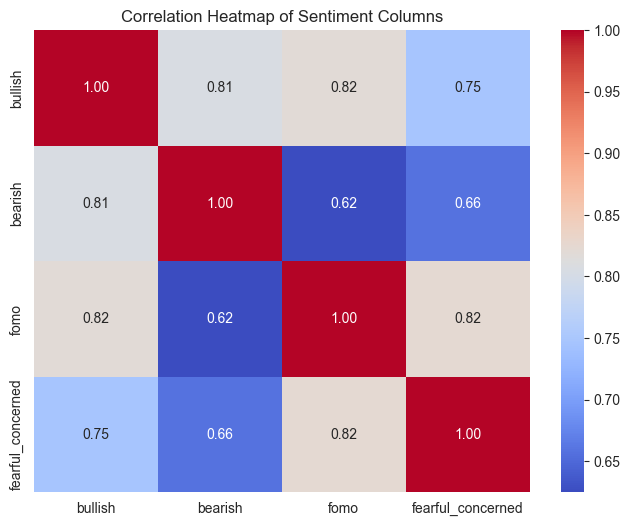

In [ ]:
def plot_sentiment_correlation_heatmap(df, columns):
    """Plot a heatmap of correlations between sentiment columns.

    Args:
        df (pd.DataFrame): The dataframe containing sentiment data.
        columns (list): List of sentiment/theme column names to include.
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    available_cols = [col for col in columns if col in df.columns]
    corr = df[available_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Sentiment Columns')
    plt.show()

# Example usage:
plot_sentiment_correlation_heatmap(df, sentiment_cols)

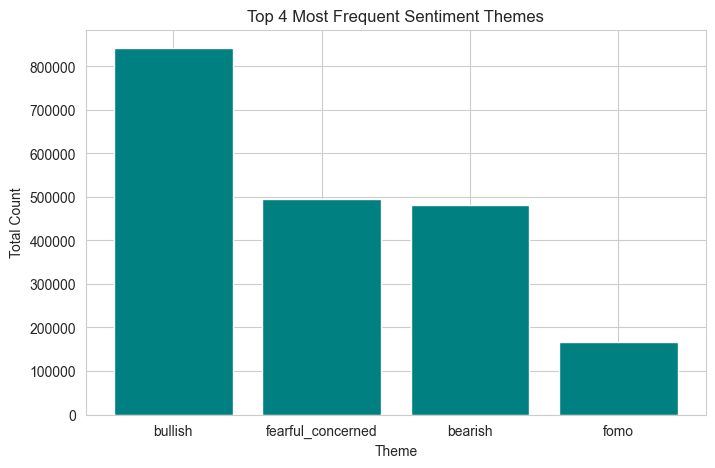

In [ ]:
def plot_top_n_themes(df, columns, n=5):
    """Plot a bar chart of the top N most frequent sentiment/themes.

    Args:
        df (pd.DataFrame): The dataframe containing sentiment data.
        columns (list): List of sentiment/theme column names to consider.
        n (int): Number of top themes to display.
    """
    import matplotlib.pyplot as plt
    theme_counts = {col: df[col].sum() for col in columns if col in df.columns}
    sorted_themes = sorted(theme_counts.items(), key=lambda x: x[1], reverse=True)[:n]
    names, counts = zip(*sorted_themes)
    plt.figure(figsize=(8, 5))
    plt.bar(names, counts, color='teal')
    plt.title(f'Top {n} Most Frequent Sentiment Themes')
    plt.xlabel('Theme')
    plt.ylabel('Total Count')
    plt.show()

# Example usage:
plot_top_n_themes(df, sentiment_cols, n=4)

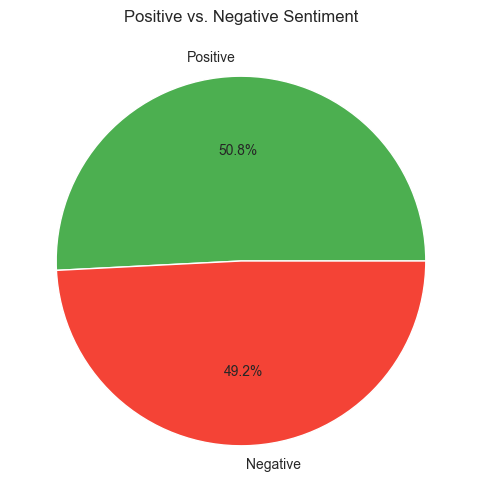

In [ ]:
def plot_positive_vs_negative(df, positive_cols, negative_cols):
    """Plot a pie chart comparing total counts of positive vs. negative sentiment columns.

    Args:
        df (pd.DataFrame): The dataframe containing sentiment data.
        positive_cols (list): List of positive sentiment column names.
        negative_cols (list): List of negative sentiment column names.
    """
    import matplotlib.pyplot as plt
    pos_total = sum(df[col].sum() for col in positive_cols if col in df.columns)
    neg_total = sum(df[col].sum() for col in negative_cols if col in df.columns)
    plt.figure(figsize=(6, 6))
    plt.pie([pos_total, neg_total], labels=['Positive', 'Negative'], autopct='%1.1f%%', colors=['#4CAF50', '#F44336'])
    plt.title('Positive vs. Negative Sentiment')
    plt.show()

# Example usage:
positive_cols = ['bullish', 'fomo']
negative_cols = ['bearish', 'fearful_concerned']
plot_positive_vs_negative(df, positive_cols, negative_cols)

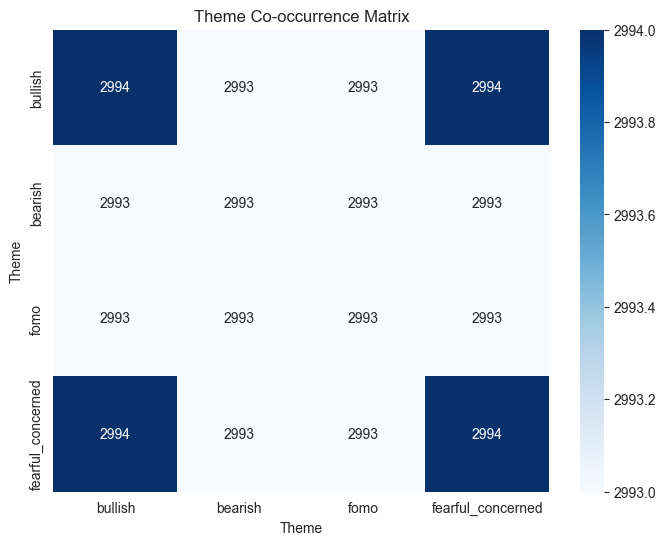

In [ ]:
def plot_theme_cooccurrence_matrix(df, columns):
    """Plot a co-occurrence matrix for sentiment/theme columns.

    Args:
        df (pd.DataFrame): The dataframe containing sentiment data.
        columns (list): List of sentiment/theme column names to analyze.
    """
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    available_cols = [col for col in columns if col in df.columns]
    co_matrix = np.zeros((len(available_cols), len(available_cols)), dtype=int)
    for i, col1 in enumerate(available_cols):
        for j, col2 in enumerate(available_cols):
            co_matrix[i, j] = ((df[col1] > 0) & (df[col2] > 0)).sum()
    plt.figure(figsize=(8, 6))
    sns.heatmap(co_matrix, annot=True, xticklabels=available_cols, yticklabels=available_cols, cmap='Blues', fmt='d')
    plt.title('Theme Co-occurrence Matrix')
    plt.xlabel('Theme')
    plt.ylabel('Theme')
    plt.show()

# Example usage:
plot_theme_cooccurrence_matrix(df, sentiment_cols)

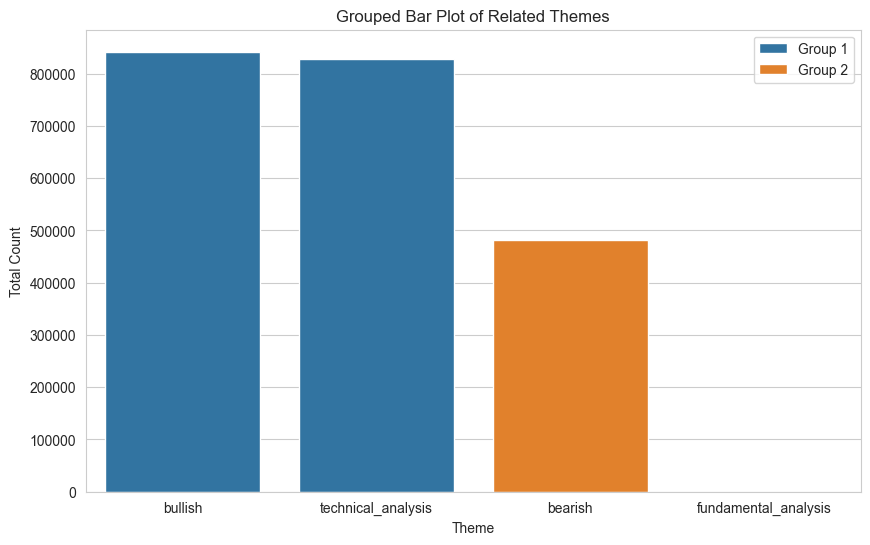

In [ ]:
def plot_grouped_bar_themes(df, group1, group2):
    """Plot a grouped bar chart comparing two related theme groups.

    Args:
        df (pd.DataFrame): The dataframe containing sentiment data.
        group1 (list): List of column names for the first group.
        group2 (list): List of column names for the second group.
    """
    import matplotlib.pyplot as plt
    group1_sum = [df[col].sum() if col in df.columns else 0 for col in group1]
    group2_sum = [df[col].sum() if col in df.columns else 0 for col in group2]
    labels = group1 + group2
    values = group1_sum + group2_sum
    group_labels = ['Group 1'] * len(group1) + ['Group 2'] * len(group2)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=labels, y=values, hue=group_labels)
    plt.title('Grouped Bar Plot of Related Themes')
    plt.xlabel('Theme')
    plt.ylabel('Total Count')
    plt.show()

# Example usage:
# Replace with actual related theme columns if available
group1 = ['bullish', 'technical_analysis']
group2 = ['bearish', 'fundamental_analysis']
plot_grouped_bar_themes(df, group1, group2)

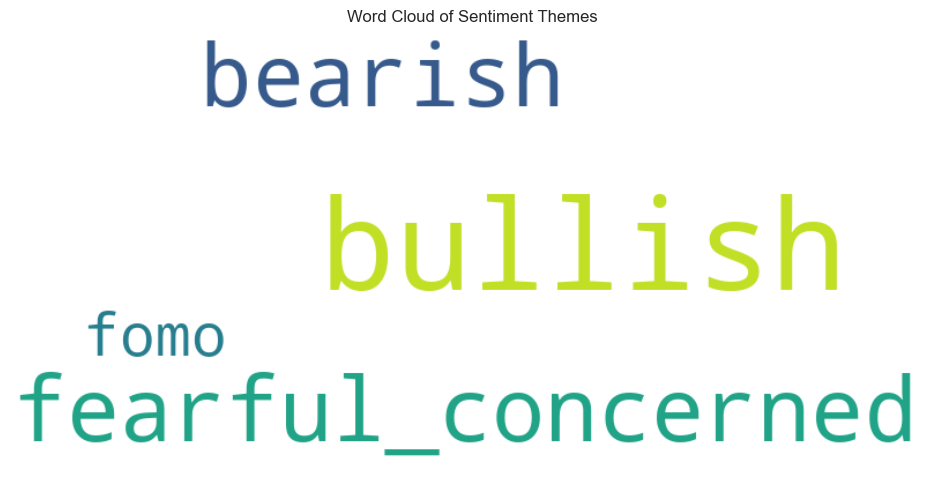

In [ ]:
def plot_theme_wordcloud(df, columns):
    """Generate a word cloud for the most common sentiment/themes.

    Args:
        df (pd.DataFrame): The dataframe containing sentiment data.
        columns (list): List of sentiment/theme column names to include.
    """
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt
    theme_freq = {col: df[col].sum() for col in columns if col in df.columns}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(theme_freq)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Sentiment Themes')
    plt.show()

# Example usage:
plot_theme_wordcloud(df, sentiment_cols)

In [17]:
df.to_csv('bitcoin_sentiment.csv', index=False)